<a href="https://colab.research.google.com/github/Zerowl7/data_analys_test/blob/main/Beatifull_soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортируем библиотеки

In [ ]:
# starting with importing libraries are needed for this project
import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup
import re

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Парсим данные с сайта

In [ ]:
url_newyork_info = "https://www.citytowninfo.com/places/new-york/new-york"
response = requests.get(url_newyork_info)
soup_newyork_info = BeautifulSoup(response.text, 'html.parser')

newyork_info = soup_newyork_info.find_all('table',{'class':"tableNewDesign"})
info_all = pd.read_html(str(newyork_info))

In [ ]:
# конкатенируем первые четыре таблицы
table = [pd.DataFrame(t) for t in info_all[:4]]

ny_soc_econ_info = pd.concat(table).set_axis(['indicator', 'numerical_measure'], axis=1, inplace=False).set_index('indicator')
ny_soc_econ_info

,numerical_measure
indicator,
Total Population,8443713
Male Share of the Population,47.7%
Female Share of the Population,52.3%
Senior Citizens,14.1%
Employed Population 16+,3953532
Age of the Population,37
% of people married,40.2%
Average household size,3
Population % with Bachelor Degree or Higher,40.6%


In [ ]:
# Изменяем тип 'Numerical_measure' на float
ny_soc_econ_info['numerical_measure'] = (ny_soc_econ_info['numerical_measure'].str.replace('[%|$|,]', '', regex=True)).astype(float)

In [ ]:
ny_soc_econ_info

,numerical_measure
indicator,
Total Population,8443713.0
Male Share of the Population,47.7
Female Share of the Population,52.3
Senior Citizens,14.1
Employed Population 16+,3953532.0
Age of the Population,37.0
% of people married,40.2
Average household size,3.0
Population % with Bachelor Degree or Higher,40.6


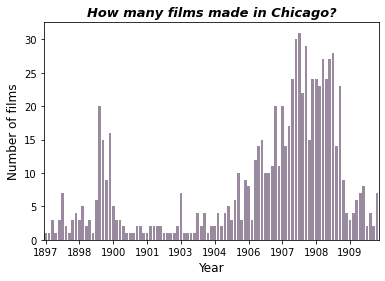

In [ ]:
movies_filmed_in_chicago_bar = movies_filmed_in_chicago.groupby('year').count().sort_values(by='year').reset_index()

ax = sns.barplot(x='year', y='movie_name', data=movies_filmed_in_chicago_bar, color='#9A86A4')
ax.set_ylabel('Number of films', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_title('How many films made in Chicago?', fontsize=13, style='oblique', weight='bold')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()